# In this assignment, you will implement linear regression with one variable.
### 100 points total

In [109]:
# clear all variables
%reset_selective -f a
#import 
import numpy as np
import matplotlib.pyplot as plt
from numpy import loadtxt

## Load data from data.csv file (5 Points)


In [110]:
# Complete the function below to load the data from data.csv. 
# Return [X,y] where X is the input and y is the target
def load_data(file_name):
    # write your code here
    mydata = np.genfromtxt(file_name, delimiter=',')
    X, y = np.split(mydata,[-1],axis=1)
    return X,y

In [111]:
[X,y] = load_data("data.csv")

### Visualise the data (5 Points)

In [112]:
def vis_data(X,y):
    # write your code here
    fig = plt.figure(figsize=(8,6))
    plt.plot(X, y,'y.')
    plt.legend(["Data"])
    plt.xlabel('X - Input')
    plt.ylabel('y - target / true')
    plt.title('Regression')

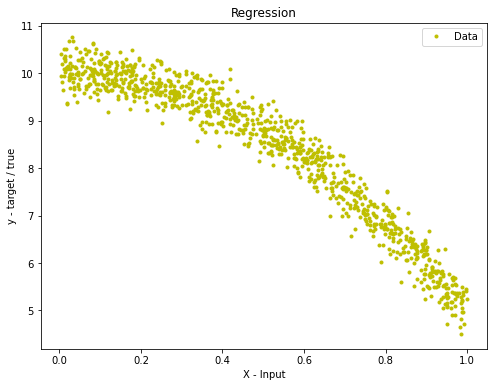

In [113]:
vis_data(X,y)

## Implement a loss function (10 Points)

In [114]:
# y_true --> the target values.
# y_pred --> the predicted values
def loss(y_true, y_pred):    
    #Calculating loss.
    loss = np.square(np.subtract(y_true,y_pred)).mean()   
    ### Using Mean Squared Error as loss function
    return loss

## Test loss function

In [115]:
loss(np.array([5,2]),np.array([10,3]))

13.0

## Implement a function to calculate gradients (20 Points)

In [116]:
#Input:
# X --> Input.
# y_true --> target values.
# y_pred --> predictions.
#return:
# dw --> the gradient with respect to the weights
# db --> the gradient with respect to the bias.
def gradients(X, y_true, y_pred):
    # write your code here
    dw = -2*(np.multiply(X,np.subtract(y_true,y_pred))).mean()
    db = -2*(np.subtract(y_true,y_pred)).mean()
    return dw, db

## Test gradients

In [117]:
dw,db = gradients(np.array([5]),np.array([1.5]),np.array([1.1]))
print(f'dw = {dw} , db = {db}')

dw = -3.999999999999999 , db = -0.7999999999999998


## Write a function that uses your loss and gradients to train a LR model (25 Points)

In [118]:
# X --> Input.
# y --> true/target value.
# add more arguments as you need
def train(X, y,Learning_rate= 0.001, Epochs = 1000):
    # write your code here
    w,b = 0,0
    for i in range(0,Epochs): ## repeating the training process for the number of Epochs 
        y_pred = w*X + b
        dw,db = gradients(X,y,y_pred)
        w = w - Learning_rate*dw
        b = b - Learning_rate*db
    # returning weights, bias and losses(List).
    return w, b

In [119]:
w, b = train(X, y,Learning_rate= 0.03, Epochs = 10000)
print(w)
print(b)

-5.005626379427368
10.855657970967295


## Write a function to use your model to predict (15 Points)

In [120]:
def predict(X, w, b):
    # write your code here
    y_pred = w*X + b     # Y_PRED  = INPUT*weights + bias
    # Returning predictions.
    return y_pred

### Visualise your predictions

Text(0.5, 1.0, 'Regression')

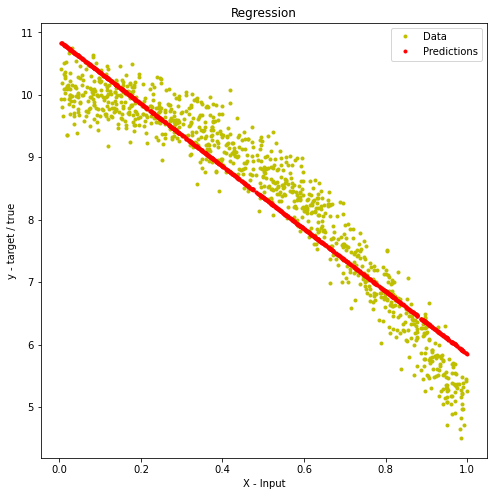

In [121]:
fig = plt.figure(figsize=(8,8))
plt.plot(X, y, 'y.')
plt.plot(X, predict(X, w, b), 'r.')
plt.legend(["Data", "Predictions"])
plt.xlabel('X - Input')
plt.ylabel('y - target / true')
plt.title('Regression')

## Calculate the fit score

In [122]:
from sklearn.metrics import r2_score

In [123]:
y_true = y
y_pred = predict(X, w, b)
r2_score(y_true, y_pred)

0.9007929514755091

### Use scikit-learn to fit a linear regression model using the data from data,csv (20 points)

In [124]:
# write your code here

from sklearn import linear_model,datasets
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X,y,test_size=0.2)

model = linear_model.LinearRegression()
model.fit(X, y)
y_pred_sk = model.predict(X)
print(mean_absolute_error(X,y_pred_sk))
r2_score(y,y_pred_sk)

7.911360281660775


0.9007929514755091